<h1><center>Laboratorio 10: Interpretabilidad ü§ñ</center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebasti√°n Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Diego Dominguez


### **Link de repositorio de GitHub:** `https://github.com/DDominguezD/MDS7202`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcci√≥n del laboratorio](#Descripci√≥n-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificaci√≥n usando `XGBoost`.
- M√©todos Agn√≥sticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- M√©todos Agn√≥sticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisar√°n entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificaci√≥n con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificaci√≥n.

El laboratorio deber√° ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al m√°ximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante m√°s eficientes que los iteradores nativos sobre DataFrames.

In [1]:
# Si usted est√° utilizando Colabolatory le puede ser √∫til este c√≥digo para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/'
except:
    print('Ignorando conexi√≥n drive-colab')

Mounted at /content/drive


In [2]:
!pip install xgboost

In [3]:
!pip install shap

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547.1/547.1 kB 8.5 MB/s eta 0:00:00


In [4]:
!pip install alibi

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 524.2/524.2 kB 9.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 110.5/110.5 kB 11.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.2/7.2 MB 69.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.5/98.5 MB 8.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 268.8/268.8 kB 15.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 41.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

# 1. Problemas Cl√≠nicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades cr√≥nicas, como la diabetes, decidi√≥ abrir una cl√≠nica especializada en el tratamiento de esta enfermedad en nuestro pa√≠s.

La cl√≠nica del Doctor Simi se convirti√≥ en un lugar donde los pacientes con diabetes podr√≠an recibir atenci√≥n m√©dica integral. El personal m√©dico estaba compuesto por especialistas en endocrinolog√≠a, nutrici√≥n y enfermer√≠a, todos capacitados en el manejo de la diabetes.

Sin embargo √©l se ha dado cuenta que los tiempos han cambiado y gracias a las tecnolog√≠as es posible generar mejores predicciones en la diabetes conociendo el historial m√©dico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus cl√≠nicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rog√≥ que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial m√©dico de las personas en forma de datos tabulares para que usted pueda realizar f√°cilmente la clasificaci√≥n.


In [5]:
import numpy as np
import pandas as pd

import shap
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# Metricas de evaluaci√≥n
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [6]:
df = pd.read_csv(path+'diabetes_data.csv')
df.head(4)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0       0.0     1.0     1.0       0.0  
2      10.0       0.0     0.0     0.0       0.0  
3       3.0       0.0     0.0     1.0       0.0

In [7]:
df.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

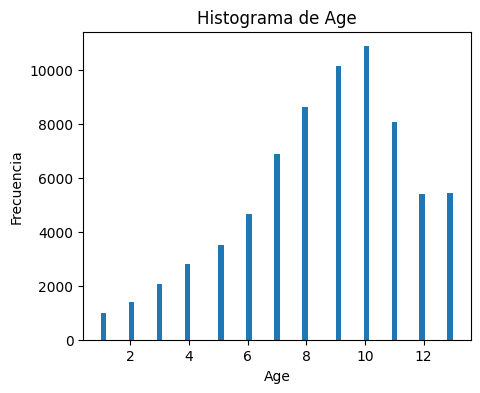

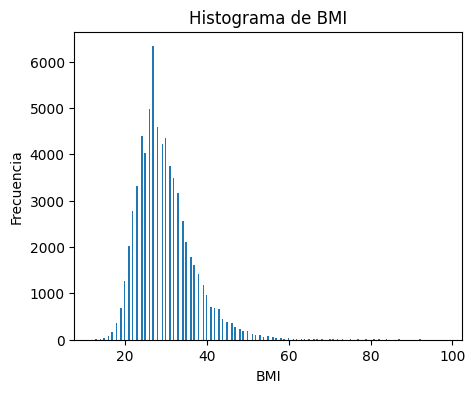

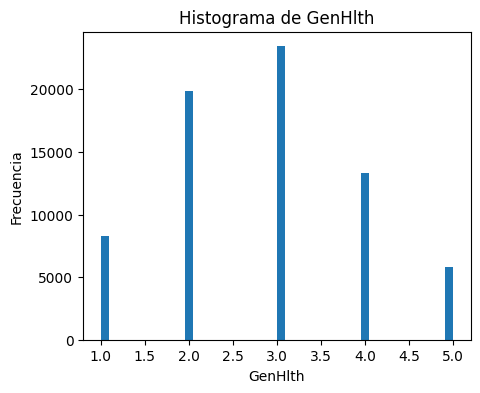

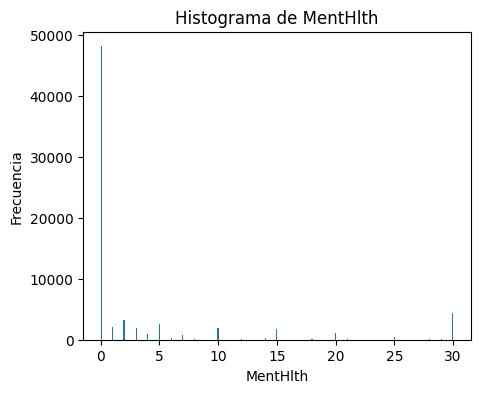

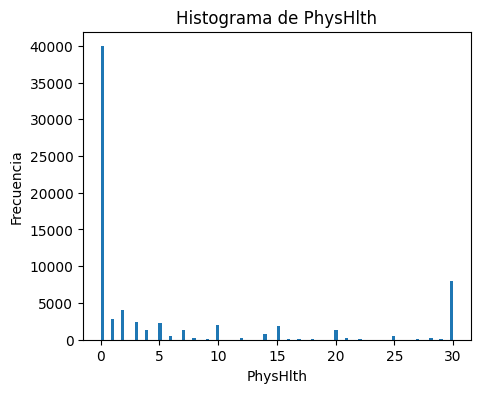

In [8]:
for columna in df.columns:
    if df[columna].nunique() > 2:
      plt.figure(figsize=(5, 4))
      plt.hist(df[columna], bins='auto')
      plt.xlabel(columna)
      plt.ylabel('Frecuencia')
      plt.title(f'Histograma de {columna}')
      plt.show()
    else:
      continue

## 2. Clasificaci√≥n de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¬øEs acaso un buen predictor de diabetes?, ¬øQu√© buscan explicar las m√©tricas utilizadas?, ¬ølas m√©tricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elecci√≥n de las features?.

### Preprocesamiento

In [9]:
#Generacion de un ColumnTransformer
preprocessing_transformer = ColumnTransformer(transformers=[
    ('standardscaler', StandardScaler(), ['BMI', 'GenHlth']),
    ('minmax', MinMaxScaler(), ['Age', 'MentHlth', 'PhysHlth'])
    ],
    remainder='passthrough', verbose_feature_names_out=False)

In [10]:
# Funcion para ordenar las columnas en el pipeline
def sort_columns(data):
    sorted_data = data[df.drop(columns=['Diabetes']).columns]
    return sorted_data

In [11]:
clf = xgb.XGBClassifier(random_state=42)
pipeline = Pipeline([
    ("preprocesamiento", preprocessing_transformer),
    ('sorter', FunctionTransformer(sort_columns)),
    ("xgb", clf)
    ])

pipeline.set_output(transform="pandas")

With transform="pandas", `func` should return a DataFrame to follow the set_output API.


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BMI', 'GenHlth']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Age', 'MentHlth',
                                                   'PhysHlth'])],
                                   verbose_feature_names_out=False)),
                ('sorter',
                 FunctionTransformer(func=<function sort_columns at 0x7faa14a9dea0>)),
                ('xgb',
                 XGBClassifier(base_score=None,...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

Antes de realizar el preprocesamiento, se llev√≥ a cabo un an√°lisis inicial de la cantidad de valores √∫nicos por columna. Esto revel√≥ que la mayor√≠a de las columnas ten√≠an valores binarios. Por lo tanto, se decidi√≥ graficar un histograma para aquellas columnas que ten√≠an una mayor diversidad de valores, con el fin de comprender mejor la distribuci√≥n de los datos.

Se observ√≥ que las columnas 'BMI' y 'GenHlth' presentaban una distribuci√≥n similar a la normal, por lo que se decidi√≥ aplicar un Standard Scaler. Por otro lado, aunque la columna de edad tambi√©n mostraba una distribuci√≥n que se asemejaba a la normal, se opt√≥ por utilizar un escalado MixMax Scaler. Esta elecci√≥n permitir√≠a obtener una medida relativa que facilitar√≠a la comparaci√≥n entre las edades, considerando su posici√≥n dentro del rango [0, 1].

Por razones similares, se decidi√≥ aplicar el mismo escalado para las columnas 'MentHlth' y 'PhysHlth', debido a su distribuci√≥n de datos algo at√≠pica.

### Entrenamiento

In [12]:
X = df.drop(columns=['Diabetes'])
y = df.loc[:, "Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, stratify=y, random_state=42)

In [13]:
pipeline.fit(X_train, y_train)

# Predecimos
y_pred = pipeline.predict(X_test)

# Evaluamos
print(classification_report(y_pred, y_test))
print(' ')

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      9615
           1       0.79      0.72      0.76     11593

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.74     21208
weighted avg       0.75      0.75      0.75     21208

 


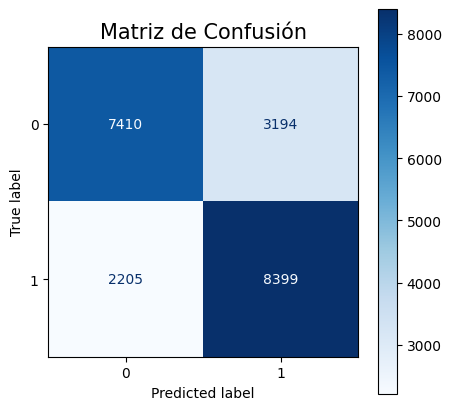

In [14]:
#Creaci√≥n de la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred) #, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# Ajuste de tama√±o
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Matriz de Confusi√≥n', fontsize=15);

La precisi√≥n se centra en minimizar los falsos positivos, el recall se centra en minimizar los falsos negativos, y el F1-score proporciona una medida equilibrada de ambos aspectos.

 Una alta precisi√≥n es importante para evitar diagnosticar err√≥neamente a alguien como diab√©tico cuando no lo es. Mientras que un alto recall indica que el modelo es capaz de identificar correctamente a la mayor√≠a de los casos positivos de diabetes, minimizando as√≠ los falsos negativos y asegurando un diagn√≥stico oportuno y adecuado.

El recall promedio obtenido es de $0.75$, lo cual puede considerarse relativamente alto. Sin embargo, en el contexto de la clasificaci√≥n de pacientes para detectar la diabetes, este valor no es suficiente, ya que implica que hay un porcentaje significativo de pacientes con diabetes que no ser√≠an correctamente diagnosticados. Adem√°s las m√©tricas entregadas no indican que caracter√≠sticas fueron las m√°s importantes al momento de realizar la clasificaci√≥n. Por estos motivos, no considero que el modelo sea un buen predictor de diabetes.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para a√±adir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los m√©todos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¬øLos resultados obtenidos con los diferentes m√©todos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¬ølas importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza √°rboles? ¬øQu√© debilidad presenta este m√©todo?

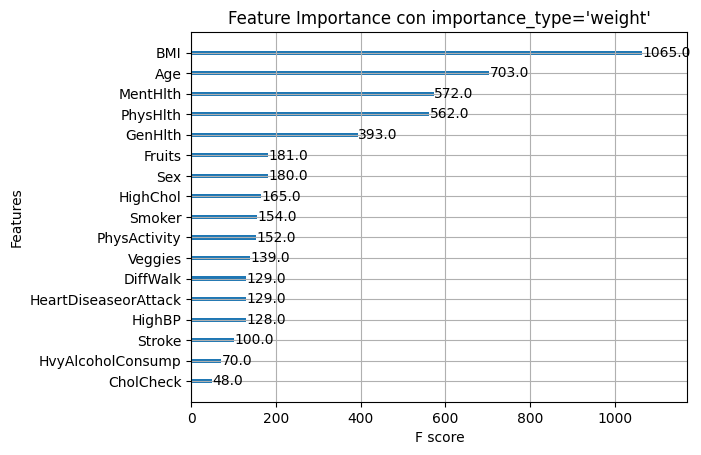

In [15]:
xgb.plot_importance(clf)
plt.title("Feature Importance con importance_type='weight'")
plt.show()

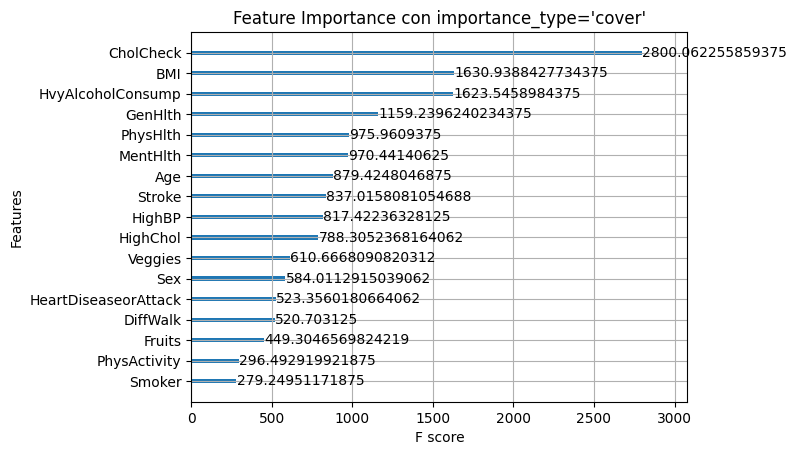

In [16]:
xgb.plot_importance(clf, importance_type="cover")
plt.title("Feature Importance con importance_type='cover'")
plt.show()

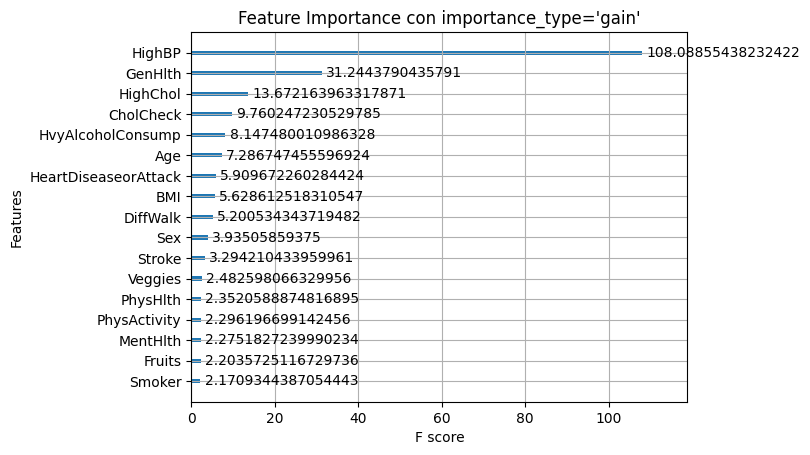

In [17]:
xgb.plot_importance(clf, importance_type="gain")
plt.title("Feature Importance con importance_type='gain'")
plt.show()

Como se puede observar, los gr√°ficos obtenidos son muy diferentes al cambiar el tipo de importancia. Se puede observar que BMI y PhysHlth tienen un alto F-Score al usar los par√°metros 'weight' y 'cover'. Esto quiere decir respectivamente que se utilizan numerosas veces cuando el modelo divide los datos a lo largo de los √°rboles de decisi√≥n, y tambi√©n significa que estas caracter√≠sticas est√°n presentes en muchos m√°s nodos del √°rbol que el resto y tienen una mayor influencia en la toma de decisiones del modelo. \
Por otro lado, HighBP es la caracter√≠stica con mayor F-Score al usar la importancia 'gain'. De hecho, tiene un valor cuatro veces mayor al segundo feature que es GenHlth. Esto indica que HighBP contribuye mucho m√°s a la reducci√≥n de la funci√≥n de p√©rdida durante el entrenamiento que el resto de caracter√≠sticas.

Aunque estos gr√°ficos proporcionan las caracter√≠sticas m√°s importantes del modelo seg√∫n el tipo de importancia utilizado, debido a las diferencias significativas entre los resultados, este m√©todo no es suficiente para establecer un orden de importancia claro entre ellas. Sin mencionar que este m√©todo puede inducir a errores en el caso de caracter√≠sticas con muchos valores posibles, ya que estas caracter√≠sticas pueden utilizarse con m√°s frecuencia simplemente porque hay m√°s oportunidades de dividirlas.

## 4. M√©todos Agn√≥sticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la secci√≥n anterior, Dr. Simi le pide implementar un **m√©todo de permutaci√≥n** que le permita observar la importancia de las features. Visualice los resultados de este m√©todo en un gr√°fico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviaci√≥n est√°ndar de sus resultados (¬øQu√© se√±ala est√°?). Adem√°s, responda las siguientes preguntas:


1) ¬øC√≥mo mide la importancia de las features su propuesta?\
2) ¬øQu√© features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¬øTienen sentido?\
3) ¬øC√≥mo cambian sus conclusiones con respecto a las features importances del punto anterior?\
4) Nombre y explique 3 ventajas y 3 desventajas del m√©todo implementado.

In [18]:
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)
result

{'importances_mean': array([ 0.02688765,  0.00108607,  0.01033887,  0.00339809,  0.03027002,
         0.00044009,  0.00265466,  0.00030177,  0.00029391,  0.0002389 ,
         0.00314032,  0.05647869, -0.00015403,  0.00215013,  0.00306802,
         0.00090375,  0.01651107]),
 'importances_std': array([0.00178451, 0.00069036, 0.00156143, 0.00052688, 0.00197189,
        0.00049533, 0.00053362, 0.00062892, 0.00066099, 0.00063178,
        0.00056525, 0.00222434, 0.0009654 , 0.00080044, 0.00072976,
        0.00044301, 0.00118245]),
 'importances': array([[ 2.71595624e-02,  2.79139947e-02,  2.85741230e-02,
          2.88098831e-02,  2.24915126e-02,  2.53206337e-02,
          2.51320257e-02,  2.69709544e-02,  2.38117691e-02,
          2.59336100e-02,  2.78196907e-02,  2.70652584e-02,
          2.81497548e-02,  2.76782346e-02,  2.68766503e-02,
          2.51320257e-02,  2.23972086e-02,  2.83383629e-02,
          2.84798189e-02,  2.92342512e-02,  2.69238023e-02,
          2.87155790e-02,  2.8432

In [19]:
#Desviacion estandar de cada feature
result.importances_std

array([0.00178451, 0.00069036, 0.00156143, 0.00052688, 0.00197189,
       0.00049533, 0.00053362, 0.00062892, 0.00066099, 0.00063178,
       0.00056525, 0.00222434, 0.0009654 , 0.00080044, 0.00072976,
       0.00044301, 0.00118245])

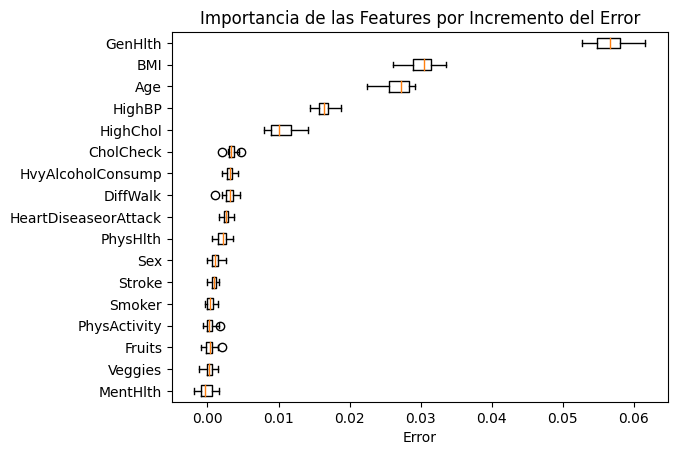

In [20]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(df.drop(columns=['Diabetes']).columns)[perm_sorted_idx], #Revisar
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

**1)** La importancia de las features se determina al medir c√≥mo afecta su permutaci√≥n al rendimiento del modelo. Si permutar una caracter√≠stica en el conjunto de test causa una disminuci√≥n significativa en el rendimiento del modelo, se considera que la caracter√≠stica es importante.

**2)** Como se puede observar en el gr√°fico obtenido, las car√°cteristicas que tienen m√°s impacto en la salida del modelo son GenHlth, BMI, Age, HighBP y HighChol. Lo cu√°l tiene sentido, pues est√°s vairables representan los √≠ndices de masa del cuerpo, los niveles de colesterol y presi√≥n, junto a la edad del paciente.

**3)** Los resultados obtenidos son coherentes con la importancia de las caracter√≠sticas obtenidas con $\texttt{xgb.plot_importance()}$, salvo por la columna HighBP, ya que esta no obtuvo un F-Score tan alto en comparaci√≥n con las otras cuatro columnas mencionadas.

**4)** Las ventaha de este m√©todo son que permite una f√°cil interpretaci√≥n, una alta compresi√≥n de interpretabilidad global, y adem√°s no es necesario re-entrenar el modelo.\
Las desventajas ser√≠an que este m√©todo esta ligado los errores que pueda tener el modelo, por lo que depende mucho de la robustes de este. Tambi√©n puede generar sesgos por entradas at√≠picas que se pueden generar por la permutaci√≥n, en especial cuando las features est√°n muy correlacionadas entre s√≠. Por √∫ltimo, a√±adir una feature correlacionada puede decrecer la importancia de una feature asociada, dividiendo as√≠ la importancia entre ambas caracter√≠sticas

## 5. M√©todos Agn√≥sticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber c√≥mo funciona el modelo de predicci√≥n a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmac√©utico le pide calcular los *shap values* de su modelo. ¬øQu√© representa cada n√∫mero en su resultado? ¬øEs posible atribuir un significado a la positividad/negatividad de cada valor?

In [21]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [22]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer(X)

In [23]:
shap_values

.values =
array([[-0.0410842 , -0.10157398, -0.43428537, ..., -0.04555928,
         0.00931672,  0.67858016],
       [ 0.01828577, -0.14552651,  0.18904144, ...,  0.02909943,
        -0.06048749,  0.44396472],
       [ 0.32893205, -0.1125998 , -0.0461641 , ..., -0.08024369,
         0.02551373, -0.7712385 ],
       ...,
       [ 0.31570172,  0.02914794,  0.42175272, ..., -0.02653435,
        -0.02536895,  0.27475402],
       [-0.0121767 ,  0.01036744,  0.29652175, ..., -0.02593282,
        -0.01086925,  0.5290728 ],
       [-0.13286543,  0.15055649,  0.2271811 , ..., -0.02066308,
        -0.02130302,  0.40102375]], dtype=float32)

.base_values =
array([-0.00838083, -0.00838083, -0.00838083, ..., -0.00838083,
       -0.00838083, -0.00838083], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.

Los Shap values representan la contribuci√≥n de cada caracter√≠stica a la predicci√≥n realizada por el modelo de XGBoost. Un valor positivo indica que la presencia de la caracter√≠stica asociada aumenta la probabilidad de que el modelo prediga que el paciente tiene diabetes. Por otro lado, un valor negativo significa que la ausencia de la caracter√≠stica o un valor bajo de esta disminuye la probabilidad de que el modelo determine que la persona tiene diabetes

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:\
1.- ¬øQu√© variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?\
2.- ¬øExiste alg√∫n patr√≥n com√∫n entre las instancias analizadas?\
3.- ¬øEs posible generalizar estas conclusiones a todo el dataset?

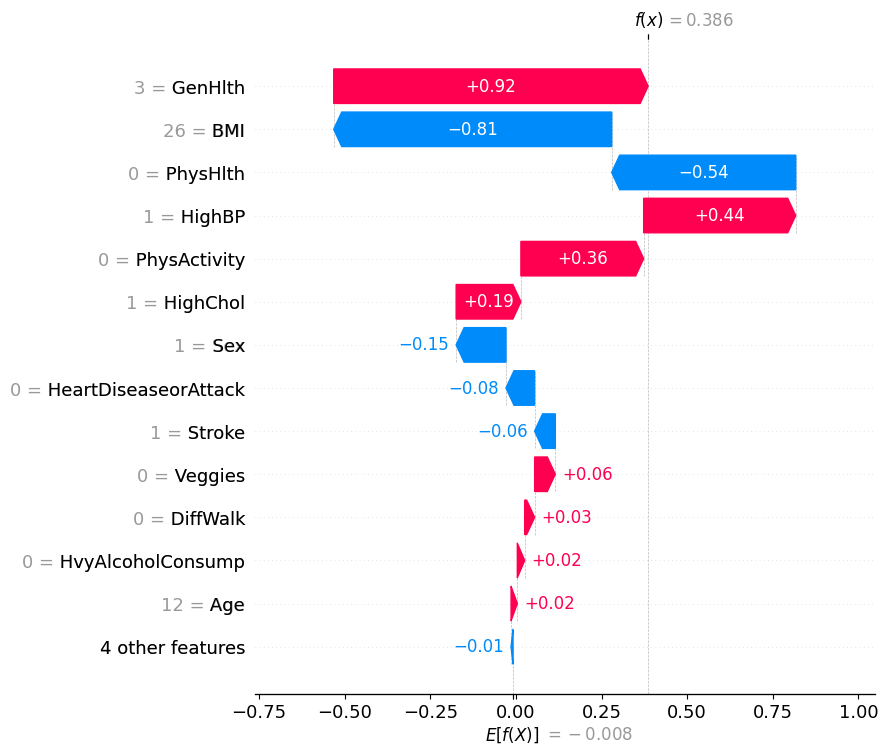

In [25]:
idx=1
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

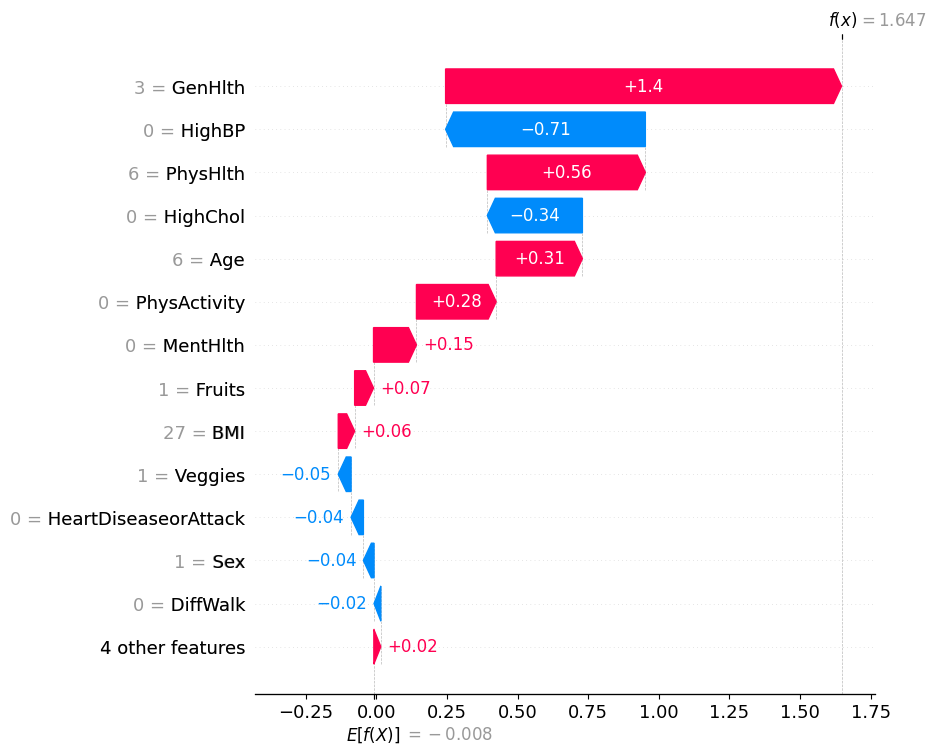

In [26]:
idx=9
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

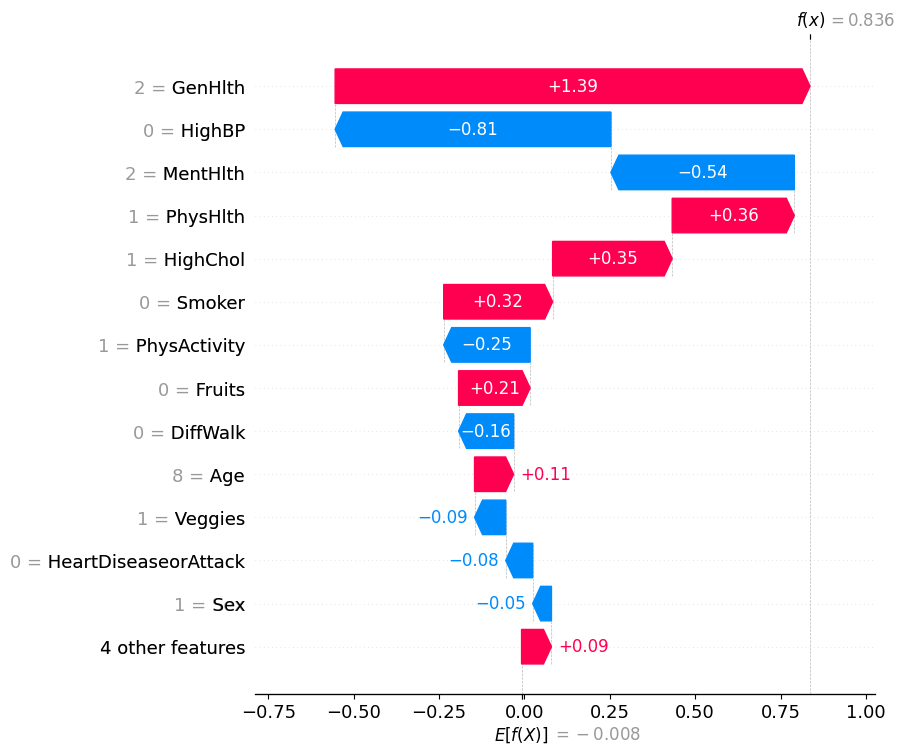

In [27]:
idx=25
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

1) La variable GenHlth afecta de manera positiva a la probabilidad de que un paciente sea diagnosticado con diabetes. Por otro lado, las variables HighChol, PhysHlth y HighBP tambi√©n aportan una gran importancia a la decisi√≥n tomada por el modelo, no obstante la forma en que afectan a la probabilidad de ser diagnosticado por diabetes var√≠a de persona en persona, por ejemplo, para la el paciente 1, HighCol tiene un valor shap positivo, mientras que en el paciente 9, el valor es negativo.

2) Para las 3 instancias estudiadas, se puede observar que las caracter√≠sticas Age y GenHlth poseen shap values positivos, mientras que las variable HeartDiseaseorAttack contribuye negativamente a la probabilidad de predicci√≥n de ser diagnosticado con diabetes.

3) Si bien, hay algunos patrones que se presentan en las tres instancias estudiadas, la importancia de la mayor√≠a de las caracter√≠sticas var√≠a mucho entre paciente. Por lo que se recomienda explorar otras t√©cnicas de interpretaci√≥n y an√°lisis para obtener una comprensi√≥n m√°s global de las caracter√≠sticas importantes en la clasificaci√≥n de la diabetes.

### Parte C (0.4 pt)

Genere ahora una visualizaci√≥n donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¬øQu√© diferencias existen con las conclusiones generadas a nivel de instancia?

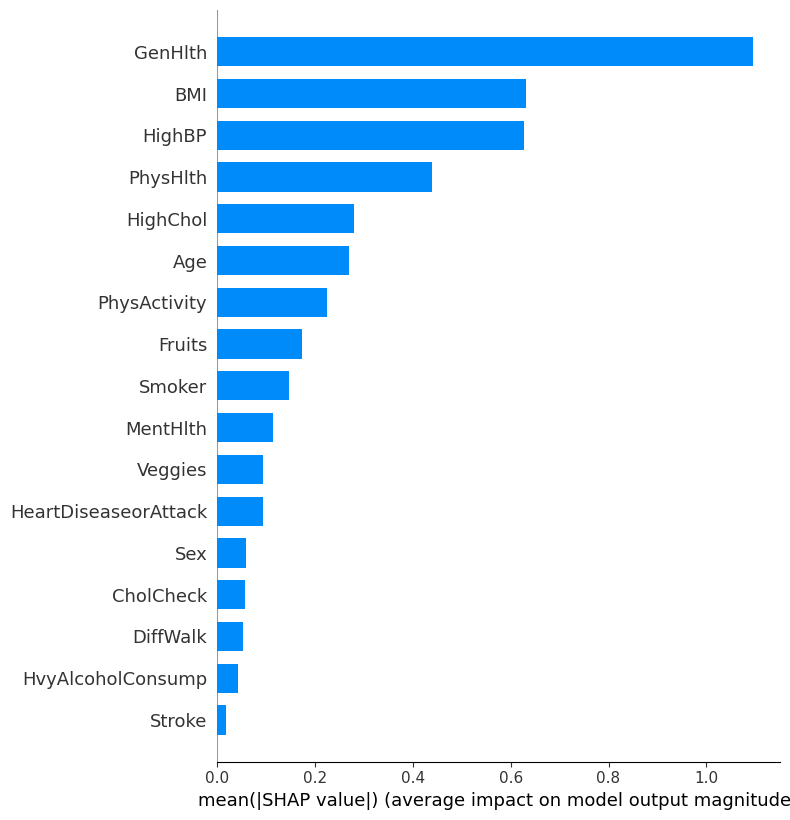

In [28]:
shap.summary_plot(shap_values, X, plot_type="bar")

Este gr√°fico corresponde al promedio del valor absoluto de los valores Shap en cada variable. De aqu√≠ se puede observar las caracter√≠sticas que tienen un imapcto m√°s significativo en la predicci√≥n del modelo. Entre esta est√°n las variables GenHlth, BMI, HighBP, PhysHlth y HighCol, lac cu√°les fueron mencionadas en el an√°lisis anterior al estudiar cada instancia por separado.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


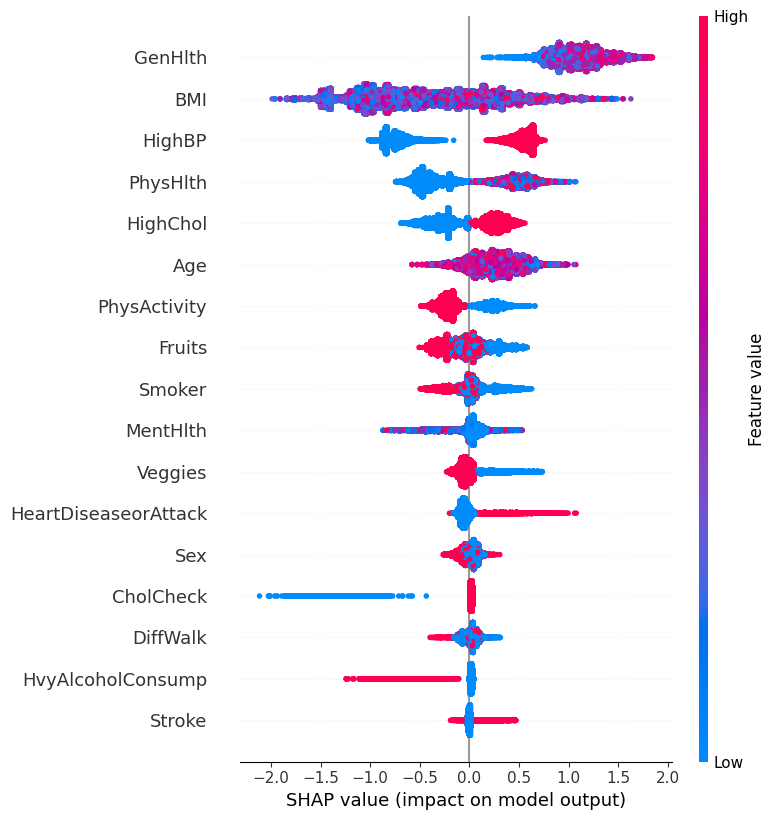

In [29]:
shap.summary_plot(shap_values, X)

En este otro gr√°fico, se muestra la distribuci√≥n de los valores Shap para cada caracter√≠stica. Se puede observar que las variables "HighBP" y "HighCol", cuando tienen valores bajos, contribuyen a que el modelo prediga que el paciente no tiene diabetes. Sin embargo, cuando estas variables toman valores altos, aumenta la probabilidad de que el modelo clasifique a la persona como diab√©tica.

Por otro lado, se puede notar que para la caracter√≠stica m√°s importante,"GenHlth", sin importar el valor que tome el modelo tiende a diagnosticar a la persona con diabetes.

Sin embargo, la influencia de la segunda caracter√≠stica, "BMI", no es tan clara. Los valores de esta variable son muy diferentes para cada instancia y tambi√©n cambian en t√©rminos de c√≥mo contribuyen a la predicci√≥n del modelo.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gr√°fico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¬øQu√© puede concluir de sus resultados?

In [30]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

# Revisamos las features
feature_importance_names

Index(['GenHlth', 'BMI', 'HighBP', 'PhysHlth', 'HighChol', 'Age',
       'PhysActivity', 'Fruits', 'Smoker', 'MentHlth', 'Veggies',
       'HeartDiseaseorAttack', 'Sex', 'CholCheck', 'DiffWalk',
       'HvyAlcoholConsump', 'Stroke'],
      dtype='object')

In [31]:
y_pred_proba = clf.predict_proba(X)[:, 1]

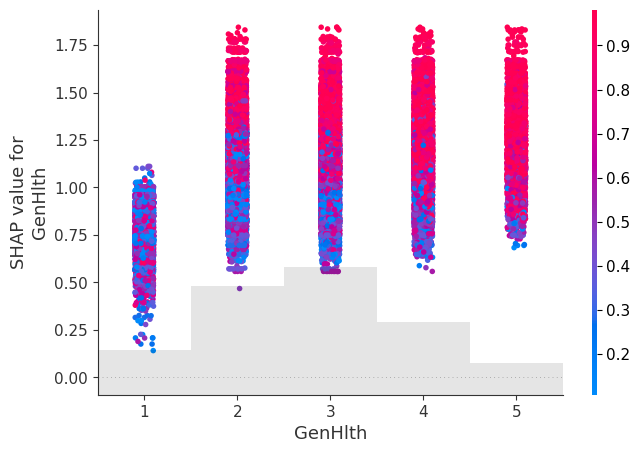

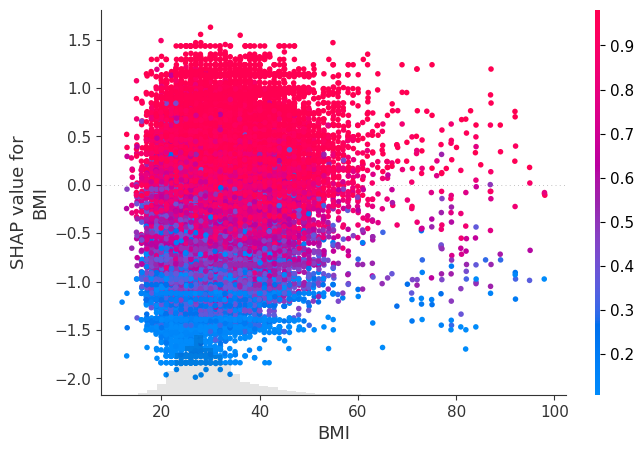

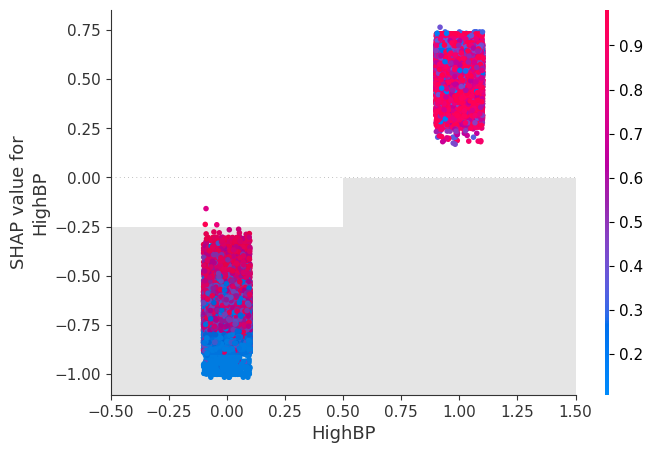

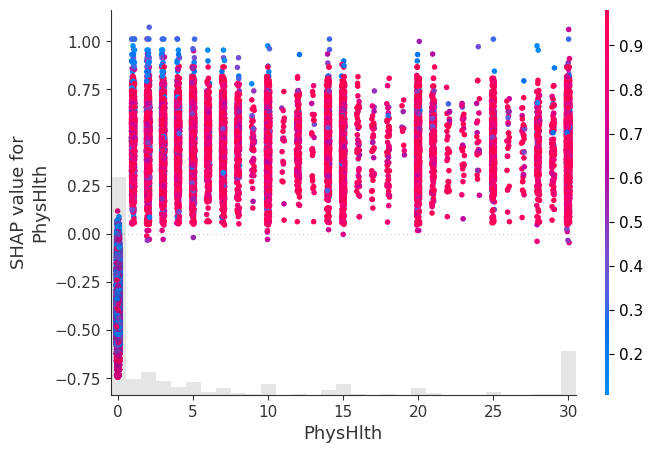

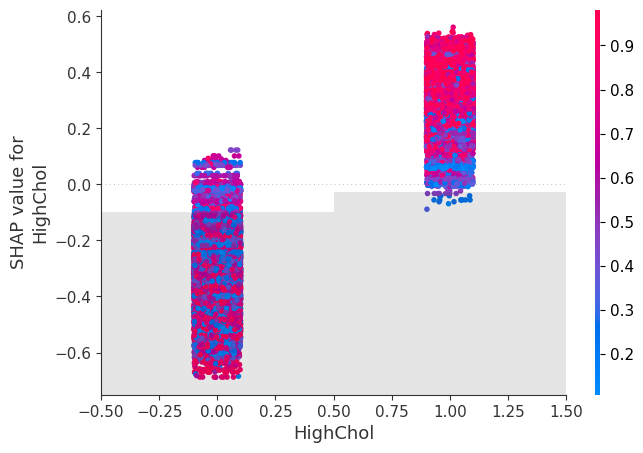

In [32]:
for name in feature_importance_names[:5]:
  shap.plots.scatter(shap_values[:,name], color=y_pred_proba) #shap_values)

Al colorear por la probabilidad de tener diabetes, se puede observar lo siguiente:\
-Para GenHlth (feature con mayor impacto global) se observa que a medida que aumenta su valor, tambi√©n aumenta la probabilidad de ser diagnosticado con diabetes. \
-Para BMI, se puede observar que en las intancias que presentan un valor shap m√°s alto, tambi√©n es m√°s probable de que el paciente sea diagnosticado diab√©tico. \
-En el caso de PhysHlth, se tiene que el modelo clasificara al paciente como diab√©tico para la gran mayor√≠a de valores que tome esta variable. \
-Por √∫ltimo para HighBP y HighCol, se obtuvo que cuando estas variables son 0, no contribuyen significativamente a la predicci√≥n del modelo. Mientras que cuando son 1, la mayor√≠a de las instancias ser√°n clasificadas como diab√©ticas por el modelo.  

### Parte E (0.4 pt)

Finalmente, se le pide generar un gr√°fico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¬øQu√© relaci√≥n existe entre la salida promedio del modelo y cada feature analizada? ¬øSon estas conclusiones generalizables para todo el conjunto de datos?

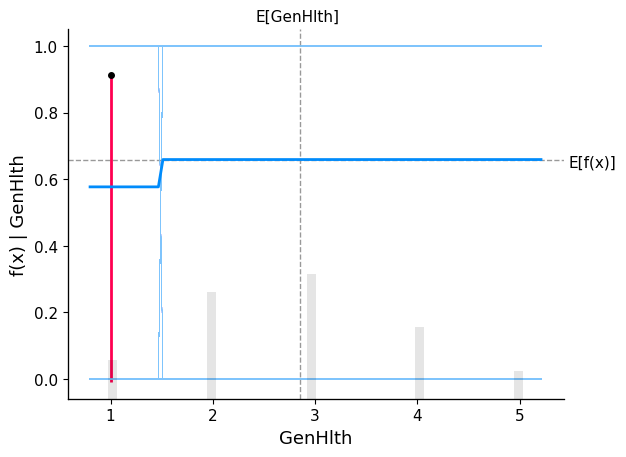

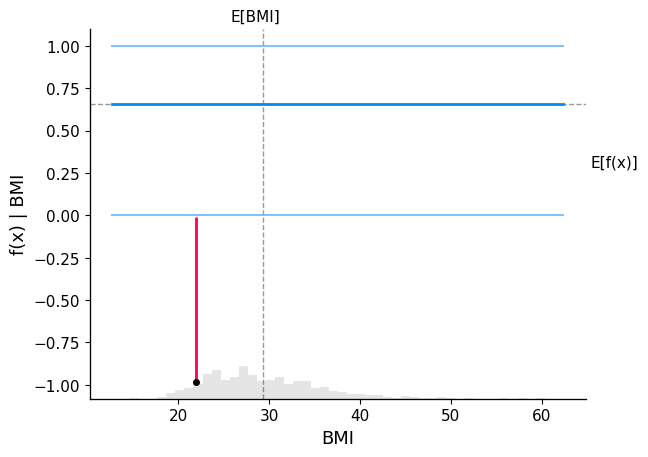

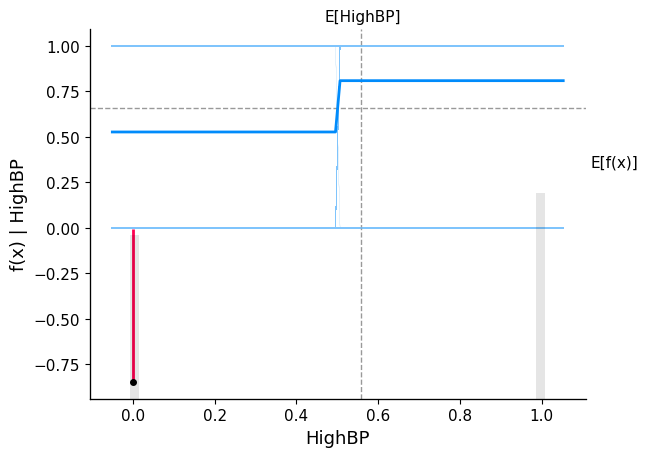

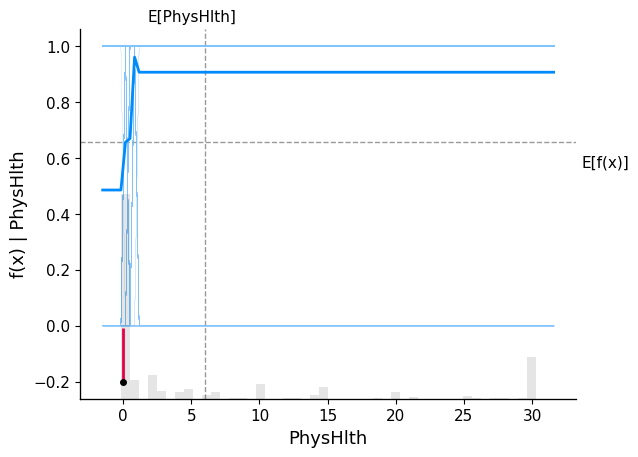

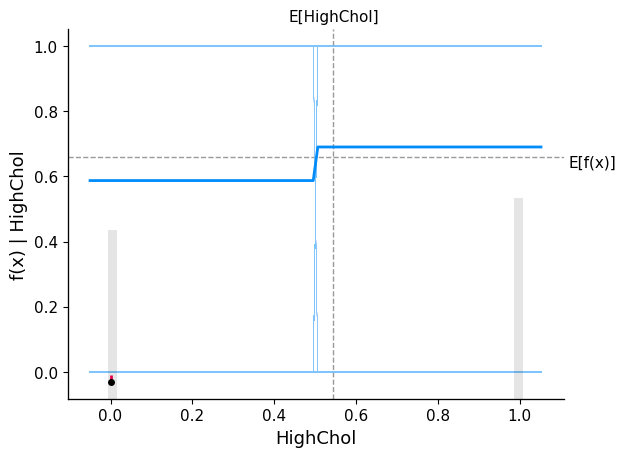

In [33]:
for name in feature_importance_names[:5]:
  X1000 = shap.utils.sample(X, 1000, random_state=42)
  sample_ind = 20
  shap.partial_dependence_plot(
      name, clf.predict, X1000, model_expected_value=True,
      feature_expected_value=True, ice=True,
      shap_values=shap_values[sample_ind:sample_ind+1,:]
)

A partir de los gr√°ficos anteriores, se puede observar que el valor de predicci√≥n del modelo se mantiene pr√°cticamente constante para las 5 caracter√≠sticas con mayor impacto global, con peque√±as variaciones que ocurren en intervalos espec√≠ficos. Es interesante destacar que la variable PhysHlth muestra un cambio m√°s significativo en f(x). Para valores bajos, se observa un comportamiento lineal en los valores de predicci√≥n, pero a medida que los valores aumentan, la predicci√≥n se estabiliza y se vuelve constante.

Aunque el gr√°fico de dependencia parcial es una herramienta √∫til para comprender la relaci√≥n entre una caracter√≠stica y la salida del modelo, no logra capturar todas las posibles interacciones y dependencias entre las caracter√≠sticas, ni proporciona una descripci√≥n completa de la relaci√≥n para cada instancia individual. Por lo tanto, es necesario complementar estos gr√°ficos con otros an√°lisis para obtener conclusiones generalizadas que sean aplicables a todo el conjunto de datos.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Despu√©s de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisi√≥n tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas se√±ale a **cu√°nta poblaci√≥n** es posible explicar con estas reglas e indique la **precisi√≥n** que poseen las reglas en la totalidad de los datos. ¬øTienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta se√±alando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [34]:
from alibi.explainers import AnchorTabular

In [35]:
predict_fn = lambda x: clf.predict(x)
explainer = AnchorTabular(predict_fn, clf.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1, 'disc_perc': (25, 50, 75)},
  'version': '0.9.4'}
)

In [36]:
idxs=[1000, 3001, 5751]
class_names = ["No Diabetico", "Diabetico"]

for id in idxs:
  # Genera explicaciones
  explanation = explainer.explain(X_test.to_numpy()[id], threshold=0.95)

  # Accede a los atributos de explicaci√≥n
  print(f'Sistema de reglas para el id = {id}')
  print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[id].reshape(1, -1))[0]])
  print('Anchor: %s' % (' AND '.join(explanation.anchor)))
  print('Precision: %.2f' % explanation.precision)
  print('Coverage: %.2f' % explanation.coverage)
  print(' ')

Sistema de reglas para el id = 1000
Prediction:  No Diabetico
Anchor: PhysHlth <= 0.00 AND HighBP <= 0.00 AND PhysActivity > 0.00 AND HighChol <= 0.00 AND BMI <= 29.00 AND Sex > 0.00
Precision: 0.96
Coverage: 0.05
 
Sistema de reglas para el id = 3001
Prediction:  No Diabetico
Anchor: PhysHlth <= 0.00 AND HighBP <= 0.00 AND HighChol <= 0.00 AND PhysActivity > 0.00 AND Fruits > 0.00
Precision: 0.97
Coverage: 0.11
 
Sistema de reglas para el id = 5751
Prediction:  Diabetico
Anchor: PhysHlth > 5.00 AND HighBP > 0.00
Precision: 1.00
Coverage: 0.18
 


1) Para la observaci√≥n 1000, se determin√≥ con una precisi√≥n del 96% que el paciente no ser√° clasificado como diab√©tico. Esto es coherente ya que el sistema de reglas indica que esta persona no presenta una alta presi√≥n sangu√≠nea (HighBP), ni niveles altos de colesterol (HighCol), y su √≠ndice de masa corporal (BMI) se encuentra en rangos aceptables. Sin embargo, el coverage para esta instancia es del 5%, lo que indica que estas reglas no se aplican de manera generalizada a todo el conjunto de datos.

2) Para la observaci√≥n 3001, se concluy√≥ con una precisi√≥n del 97% que el paciente no ser√° clasificado como diab√©tico, lo cual tambi√©n es coherente. Al igual que en el caso anterior, no presenta una alta presi√≥n sangu√≠nea ni niveles altos de colesterol. Adem√°s, parece ser una persona saludable, ya que realiza actividad f√≠sica y se alimenta con frutas. El coverage en este caso es del 11%, lo que significa que esta explicaci√≥n es v√°lida para aproximadamente una d√©cima parte de las instancias similares en el conjunto de datos.

3) Para la observaci√≥n 5751, se clasific√≥ al paciente como diab√©tico. El sistema de reglas indica que esta persona puede tener hipertensi√≥n. La precisi√≥n es del 100% y el coverage es del 18%, que si bien no es muy alto, esta explicaci√≥n representa a m√°s casos que las observaciones anteriores.

# Retrospectiva... (1 pt)

En base a los diferentes m√©todos que implementa y ha comentado en este laboratorio, comente qu√© m√©todos le permiten entregar mejores conclusiones para la tarea de clasificaci√≥n de diabetes. Por otro lado, ¬øqu√© m√©todos son m√°s √∫tiles para el problema del doctor Simi, m√©todos agnosticos locales o globales?

**Respuesta:** \
Despu√©s de realizar los an√°lisis correspondientes, considero que en este caso resultan m√°s √∫tiles los m√©todos agn√≥sticos locales. Dado que estamos tratando con un tema relacionado con la salud, es fundamental tener precauci√≥n no solo con el rendimiento del modelo, sino tambi√©n con las conclusiones que se pueden extraer a partir de √©l. Si nos limit√°ramos a un an√°lisis global, estar√≠amos reduciendo la interpretaci√≥n a solo unas pocas variables, y es probable que los m√©dicos ya tuvieran conocimiento de cu√°les variables se correlacionan m√°s con el diagn√≥stico de diabetes.

Sin embargo, mediante el uso de los shap values, podemos estudiar el impacto de la predicci√≥n del modelo caso por caso. Esto nos brinda informaci√≥n valiosa sobre c√≥mo ciertas variaciones en caracter√≠sticas espec√≠ficas influyen en la respuesta final del modelo. Esta informaci√≥n podr√≠a resultar muy √∫til para el personal m√©dico, ya que les permitir√≠a identificar patrones que revelen si un paciente es diab√©tico o no. De esta manera, podr√≠an realizar un diagn√≥stico a tiempo e iniciar un tratamiento adecuado. Es importante considerar que este enfoque m√°s detallado puede proporcionar una visi√≥n m√°s completa y precisa de cada caso individual, mejorando as√≠ la toma de decisiones en el √°mbito de la salud.

# Conclusi√≥n
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>